### Filters applying Pt. 4. Discretization and quantization of the image

Discretization algorithm:
    <ol>
        <li>
            Define K - kernel size
        </li>
        <li>
            Resize source image size in the way that (h - w % K == 0)
        </li>
        <li>
            Set kernel on at the first index in image, move kernel through the image and compute average of each color separately.
        </li>
        <li>
            Set each pixel as average in current kernel. 
        </li>
        <li>
            Then skip next K pixels and repeat steps from 3 to 5 until the whole image will be processed. 
        </li>
        <li>
            Reset original size of the image.
        </li>
    </ol>

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


def displayImage(image, color_option=None):
    plt.imshow(image, color_option)
    plt.axis('off')
    

image_path = '../03.jpg'

bgr_image = cv2.imread(image_path, 0)


Converting BGR to RGB image. Display source image.

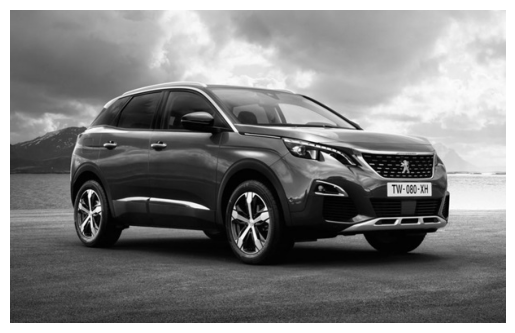

In [2]:
source_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

displayImage(source_image)

Defining source image shape.

In [3]:
image_shape = source_image.shape

Defining function for discretization:
    <ol>
        <li>
            Modify original height and width of the source image to make it multiple of K.
        </li>
        <li>
            Resize image with new size.
        </li>
        <li>
            Go through the image with step K.
        </li>
        <li>
            Set each pixel at the current kernel state with average in this kernel.
        </li>
        <li>
            Reset previous size of the image.
        </li>
    </ol>
    

In [4]:
def makeDiscretization(image, image_shape, K=10):
    source_height, source_width = image_shape[0], image_shape[1]
    
    h = (source_height - source_height % K)
    w = (source_width - source_width % K)
    
    image = cv2.resize(image, (w, h))
    
    for y in range(0, h - 1, K):
        for x in range(0, w - 1, K):
            if len(image_shape) > 2:
                average = np.average(image[y:(y+K), x:(x+K)], axis=0)
            else:
                average = np.average(image[y:(y+K), x:(x+K)])
            
            image[y:(y+K), x:(x+K)] = average
    
    image = cv2.resize(image, (source_width, source_height))
    
    return image

Call ```makeDiscretization(image, image_shape, K=10)``` method and display outpot image.

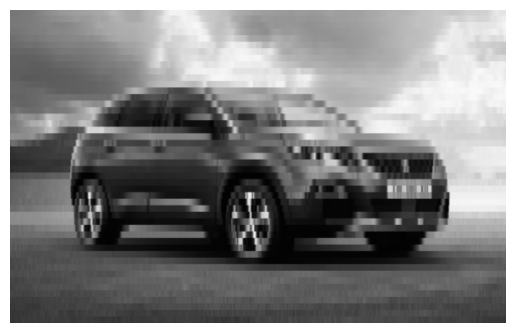

In [5]:
output_image = makeDiscretization(source_image, image_shape, K=8)

displayImage(output_image)

Quantization algorithm helps to reduce size of the source image or simplify its processing by reducing amount of colors that are used for displaying it.

<ol>
    <li>Convert image from BGR to RGB</li>
    <li>Reshape the image into a 2D array of pixels and 3 color values (RGB).</li>
    <li>Define the iteration termination criteria </li>
    <li>Run K-means algoritms to get labels to determine which cluster each pixel belongs to, centers center of each cluster</li>
    <li>Convert centers to uint 8-bit datatype</li>
    <li>Mappinmg labels to center points</li>
    <li>Reshape image into origin dimantions</li>
</ol>

Explanation:<br/>
    Labels list represents each individual pixel is assigned ot one of K clusters. We can get each pixel's cluster from labels list.<br/>
    For viewing segmented image we need to construct the image using labels and centers.<br/>
    Now the centers in float32 form and we need to convert it back to integer format.<br/>
    And also wee need to convert labels to pexil values of respective centers.

    Example:
        Suppose we have a numpy array a = [1, 2, 3] this is the centers array, and we need to make this array [1, 2, 3, 2, 1]
        we can easily populate using expression a[[0, 1, 2, 1, 0]] - [0, 1, 2, 1, 0] is labels from our Quantization algorithm.
        So quantized_image = centers[labels.flatten()] this code is doing the same thing as in the example above.
    
    size of labels list - H * W
    centers - K

In [6]:
def imquantize(image, graduations_count):
    temp_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    pixel_vals = temp_image.reshape(-1, 3)
    
    pixel_vals = np.float32(pixel_vals)
    
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
    _, labels, centers = cv2.kmeans(pixel_vals, graduations_count, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    centers = np.uint8(centers)
    
    quantized_image = centers[labels.flatten()].reshape(image.shape)
    
    return quantized_image

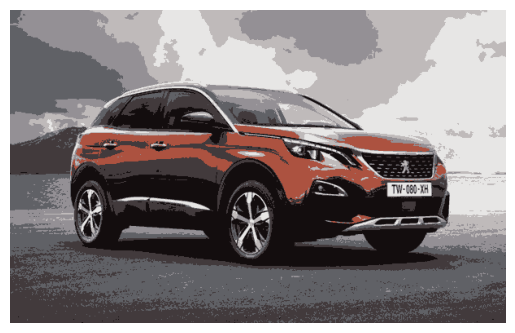

In [7]:
bgr_image = cv2.imread(image_path, 1)

quantized_image = imquantize(bgr_image, 7)

displayImage(quantized_image)